## 0. Import Libraries

In [1]:
import numpy as np
import xarray as xr

## 1. Open Data

### 1.1 Data Options

In [2]:
# change these
season = 'SON' # DJF, MAM, JJA, SON
time_resample = 6 # options: 1, 3, 6 (resampling)

# path for resampling information
if time_resample != 1:
    path_resample = fr'{time_resample}hrsum'
else:
    path_resample = fr'{time_resample}hr'
    
# general data path
path_general = fr'/mnt/d/JupyterLab/Yuksek_Lisans/msc_thesis_data'

# data source names
name_dt_cosmo = 'cosmo'
name_dt_era5 = 'era5'

# variable name
name_variable_cosmo = 'TOT_PREC'
name_variable_era5 = 'tp'

# saving path (saving with cosmo var name for both era5 and cosmo)
path_save = fr'data/{name_variable_cosmo}/'

# years
years = np.arange(1985, 2006, dtype=int)

### 1.2 Model

In [3]:
# open data
path_dt = fr'{path_general}/{name_dt_cosmo}/Tr011_MPI_RF_PR_{season}_{path_resample}_198501_200512.nc'
    
# chunk recommendation from chatGPT
dt_cosmo = xr.open_dataset(path_dt, 
                     #chunks={'rlat':2,
                     #        'rlon':2
                     #        }
                    )[name_variable_cosmo]

In [4]:
dt_cosmo

<xarray.DataArray 'TOT_PREC' (time: 7664, rlat: 107, rlon: 175)>
[143508400 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1985-09-01 ... 2005-11-30T18:00:00
    lon      (rlat, rlon) float32 ...
    lat      (rlat, rlon) float32 ...
  * rlon     (rlon) float32 -8.3 -8.19 -8.08 -7.97 ... 10.51 10.62 10.73 10.84
  * rlat     (rlat) float32 -6.2 -6.09 -5.98 -5.87 -5.76 ... 5.13 5.24 5.35 5.46

### 1.3 ERA5

In [5]:
# open data
path_dt = fr'{path_general}/{name_dt_era5}/era5_TOT_PREC_{season}_{path_resample}_1985_2005.nc'
    
# chunk recommendation from chatGPT
dt_era5 = xr.open_dataset(path_dt, 
                     #chunks={'rlat':2,
                     #        'rlon':2
                     #        }
                    )[name_variable_era5]

In [6]:
dt_era5

<xarray.DataArray 'tp' (time: 7664, latitude: 41, longitude: 93)>
[29222832 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 1985-09-01 ... 2005-11-30T18:00:00
  * longitude  (longitude) float32 24.0 24.25 24.5 24.75 ... 46.5 46.75 47.0
  * latitude   (latitude) float32 44.0 43.75 43.5 43.25 ... 34.5 34.25 34.0

## 2. Intensity Indices

In [7]:
def calculate_intensity_index(dt, time_resample):
    
    # groupby and find maximum (rx_xhr)
    rx_xhr = dt.groupby('time.year').reduce(np.max, 
                                            dim='time', 
                                            keep_attrs=True
                                           )

    # Add information about the computation to the dataset's attributes
    rx_xhr.attrs['computation'] = 'grouped by year and took maximum over time dimension'
    rx_xhr.attrs['indice_name'] = fr'rx{time_resample}hr'
    
    return rx_xhr

### 2.1 Model

In [8]:
# calculate intensity index
intensity_idx_cosmo = calculate_intensity_index(dt_cosmo, 
                                               time_resample)

In [9]:
intensity_idx_cosmo

<xarray.DataArray 'TOT_PREC' (year: 21, rlat: 107, rlon: 175)>
array([[[2.55405456e-01, 1.79495931e-01, 2.09551647e-01, ...,
         0.00000000e+00, 0.00000000e+00, 2.29492225e-02],
        [3.55480075e-01, 2.51845300e-01, 2.31679693e-01, ...,
         4.26604301e-02, 8.70940089e-02, 1.76301405e-01],
        [4.99343306e-01, 3.55435461e-01, 2.86953211e-01, ...,
         1.76456332e-01, 3.05046827e-01, 4.88283664e-01],
        ...,
        [4.77487335e+01, 5.48426781e+01, 5.21795578e+01, ...,
         9.67491245e+00, 9.39654541e+00, 9.28764439e+00],
        [4.49606476e+01, 5.31164665e+01, 5.14533844e+01, ...,
         8.21345901e+00, 8.11906052e+00, 8.92570019e+00],
        [4.45584564e+01, 5.32593384e+01, 5.27242622e+01, ...,
         6.92360020e+00, 7.34163857e+00, 8.50932026e+00]],

       [[1.16484175e+01, 1.15769043e+01, 1.13271732e+01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.21835232e+01, 1.20013733e+01, 1.16606188e+01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.25104294e+01, 1.21631460e+01, 1.16366625e+01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
...
        [2.50999928e+01, 2.55234814e+01, 2.49187469e+01, ...,
         1.08842058e+01, 9.89450264e+00, 8.88808250e+00],
        [2.73098354e+01, 2.82830391e+01, 2.77546940e+01, ...,
         1.06895523e+01, 9.88764095e+00, 9.01049423e+00],
        [2.96214752e+01, 3.21276245e+01, 3.27129288e+01, ...,
         1.05692816e+01, 1.00130491e+01, 9.28982449e+00]],

       [[2.89979279e-01, 2.73173898e-01, 2.31961802e-01, ...,
         0.00000000e+00, 0.00000000e+00, 1.15572129e-06],
        [3.30624044e-01, 3.17068964e-01, 2.78034151e-01, ...,
         7.66926718e-08, 5.01149543e-07, 5.82950670e-05],
        [6.86450124e-01, 6.69311464e-01, 6.08356178e-01, ...,
         1.02039985e-06, 1.57670445e-06, 1.56331051e-04],
        ...,
        [2.68852100e+01, 2.60778389e+01, 2.36370010e+01, ...,
         6.45963573e+00, 7.26215792e+00, 7.80869436e+00],
        [2.70976601e+01, 2.61037331e+01, 2.34991169e+01, ...,
         6.86947203e+00, 6.96309900e+00, 7.14909267e+00],
        [2.63551121e+01, 2.52647190e+01, 2.31817513e+01, ...,
         7.32186413e+00, 7.45867157e+00, 7.31116104e+00]]], dtype=float32)
Coordinates:
    lon      (rlat, rlon) float32 23.11 23.24 23.37 23.5 ... 47.92 48.08 48.23
    lat      (rlat, rlon) float32 33.34 33.35 33.36 33.38 ... 44.57 44.55 44.53
  * rlon     (rlon) float32 -8.3 -8.19 -8.08 -7.97 ... 10.51 10.62 10.73 10.84
  * rlat     (rlat) float32 -6.2 -6.09 -5.98 -5.87 -5.76 ... 5.13 5.24 5.35 5.46
  * year     (year) int64 1985 1986 1987 1988 1989 ... 2001 2002 2003 2004 2005
Attributes:
    computation:  grouped by year and took maximum over time dimension
    indice_name:  rx6hr

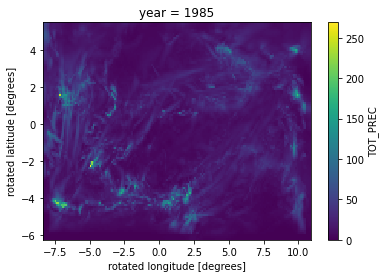

In [10]:
intensity_idx_cosmo[0].plot()

In [11]:
# save index as nc
indice_name = intensity_idx_cosmo.attrs['indice_name']
intensity_idx_cosmo.to_netcdf(fr"{path_save}/{name_dt_cosmo}/{name_dt_cosmo}_{season}_intensity_{indice_name}_198501_200512.nc")

### 2.2 ERA5

In [12]:
# calculate intensity index
intensity_idx_era5 = calculate_intensity_index(dt_era5, 
                                               time_resample)

In [13]:
intensity_idx_era5

<xarray.DataArray 'tp' (year: 21, latitude: 41, longitude: 93)>
array([[[0.00876642, 0.0073687 , 0.00780137, ..., 0.0091001 ,
         0.00777006, 0.00796047],
        [0.00838738, 0.00815197, 0.00864331, ..., 0.01135596,
         0.01210755, 0.01056693],
        [0.00778769, 0.00844858, 0.00903963, ..., 0.00746841,
         0.00865087, 0.01140959],
        ...,
        [0.01482056, 0.01343832, 0.01065872, ..., 0.01107879,
         0.0094705 , 0.00881465],
        [0.01327454, 0.01279363, 0.01056765, ..., 0.00758   ,
         0.00777617, 0.00719196],
        [0.0127256 , 0.01365717, 0.01182966, ..., 0.00612109,
         0.00663547, 0.00629747]],

       [[0.00471401, 0.00676289, 0.00769482, ..., 0.00711889,
         0.00721464, 0.00747237],
        [0.00417371, 0.0070055 , 0.00802383, ..., 0.00714337,
         0.00786976, 0.0080969 ],
        [0.00479572, 0.0038116 , 0.00626579, ..., 0.00620172,
         0.00645657, 0.00680069],
...
        [0.01611713, 0.01956696, 0.01588819, ..., 0.01070767,
         0.01077175, 0.01255498],
        [0.01644973, 0.01289586, 0.0111695 , ..., 0.00946042,
         0.00794679, 0.01079766],
        [0.01609193, 0.01358194, 0.00923328, ..., 0.01007451,
         0.0077067 , 0.00866599]],

       [[0.01887332, 0.02003383, 0.01973578, ..., 0.01356502,
         0.01384399, 0.0130312 ],
        [0.02225405, 0.01809905, 0.01614196, ..., 0.01527878,
         0.01337316, 0.01188258],
        [0.01600518, 0.01193369, 0.01655231, ..., 0.01140923,
         0.01012742, 0.00949281],
        ...,
        [0.00558583, 0.00730535, 0.00814153, ..., 0.01332457,
         0.01748713, 0.01599654],
        [0.00576617, 0.0046611 , 0.00577841, ..., 0.01621215,
         0.0187009 , 0.01698426],
        [0.0065138 , 0.00526259, 0.00604766, ..., 0.01727511,
         0.02006983, 0.01875058]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 24.0 24.25 24.5 24.75 ... 46.5 46.75 47.0
  * latitude   (latitude) float32 44.0 43.75 43.5 43.25 ... 34.5 34.25 34.0
  * year       (year) int64 1985 1986 1987 1988 1989 ... 2002 2003 2004 2005
Attributes:
    computation:  grouped by year and took maximum over time dimension
    indice_name:  rx6hr

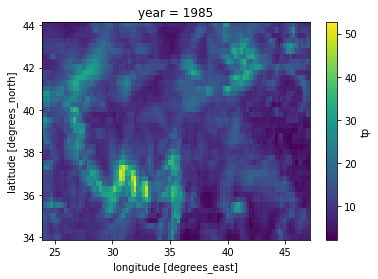

In [14]:
(intensity_idx_era5[0]*1000).plot()

In [15]:
# save index as nc
indice_name = intensity_idx_era5.attrs['indice_name']
intensity_idx_era5.to_netcdf(fr"{path_save}/{name_dt_era5}/{name_dt_era5}_{season}_intensity_{indice_name}_198501_200512.nc")

## 3. Absolute Indices

In [20]:
p99_xhr  = dt.quantile(0.99,
               dim='time',
                )

In [ ]:
kk = dt.where(dt>p99_xhr)#.count(dim='time')

In [ ]:
for year in years:
    
    Rxhr95p_xyear = dt.sel(time=str(year)).where(dt.sel(time=str(year))>p95_xhr)\
                      .groupby('time.year')\
                      .count(dim='time')
    
    # Add information about the computation to the dataset's attributes
    Rxhr95p.attrs['computation'] = 'calculated p95 grouped by year and count above 95p over time dimension'
    Rxhr95p.attrs['indice_name'] = fr'R{time_resample}hr95P'
    
    # save
    Rxhr95p.to_netcdf(fr"{path_save}{name_dt}_{season}_absolute_{Rxhr95p.attrs['indice_name']}_year{year}_198501_200512.nc")
    pri

In [9]:
# group data by year and count exceedances in time dimension
Rxhr95p = dt.where(dt>dt.quantile(0.95,
                       dim='time',
                       keep_attrs=True
                        )
                  )\
            .groupby('time.year')\
            .count(dim='time')

# Add information about the computation to the dataset's attributes
Rxhr95p.attrs['computation'] = 'calculated p95 grouped by year and count above 95p over time dimension'
Rxhr95p.attrs['indice_name'] = fr'R{time_resample}hr95P'

In [10]:
Rxhr95pt.to_netcdf(fr"{path_save}{name_dt}_{season}_absolute_{Rxhr95p.attrs['indice_name']}_198501_200512.nc")


KeyboardInterrupt

